# Concentration de $CO_2$ dans l'atmosphère depuis 1958

Nous étudions l'évolution de la concentration de $CO_2$ dans l'atmosphère depuis 1958 à partir des données de l'[Institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). L'étude a été réalisée avec les données au 23 octobre 2020. 

## Chargement et pré-traitement du jeu de données

On importe les librairies python adéquates pour étudier le jeu de données, disponible au format CSV.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Le jeu de données sont récupérées sur le site de l'institut Scripps, les données recouvrent la période de janvier 1958 à décembre 2020.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

Les 53 premières lignes sont une présentation du jeu de données, on les passe pour ne traiter que le jeu de données à proprement parler. Voici ci-dessous un extrait de ce jeu de données.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=54)
raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.70      314.44       316.18   
5    1958   04     21290   1958.2877     317.45      315.16       317.29   
6    1958   05     21320   1958.3699     317.51      314.71       317.86   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.24   
8    1958   07     21381   1958.5370     315.86      315.19       315.86   
9    1958   08     21412   1958.6219     314.93      316.19       313.99   
10   1958   09     21443   1958.7068     313.21      316.08       312.45   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.43   
12   1958   11     21504   1958.8740     313.33      315.20       313.61   
13   1958   12     21534   1958.9562     314.67      315.43       314.76   
14   1959   01     21565   1959.0411     315.58      315.54       315.62   
15   1959   02     21596   1959.1260     316.49      315.86       316.26   
16   1959   03     21624   1959.2027     316.65      315.38       316.97   
17   1959   04     21655   1959.2877     317.72      315.42       318.08   
18   1959   05     21685   1959.3699     318.29      315.49       318.65   
19   1959   06     21716   1959.4548     318.15      316.03       318.04   
20   1959   07     21746   1959.5370     316.54      315.86       316.67   
21   1959   08     21777   1959.6219     314.80      316.06       314.82   
22   1959   09     21808   1959.7068     313.84      316.73       313.31   
23   1959   10     21838   1959.7890     313.33      316.33       313.32   
24   1959   11     21869   1959.8740     314.81      316.68       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.35       317.27   
28   1960   03     21990   1960.2049     317.58      316.28       318.02   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
728  2018   07     43296   2018.5370     408.90      408.08       409.43   
729  2018   08     43327   2018.6219     407.10      408.63       407.33   
730  2018   09     43358   2018.7068     405.59      409.08       405.66   
731  2018   10     43388   2018.7890     405.99      409.61       405.84   
732  2018   11     43419   2018.8740     408.12      410.38       407.48   
733  2018   12     43449   2018.9562     409.23      410.15       409.07   
734  2019   01     43480   2019.0411     410.92      410.87       410.30   
735  2019   02     43511   2019.1260     411.66      410.90       411.25   
736  2019   03     43539   2019.2027     412.00      410.46       412.25   
737  2019   04     43570   2019.2877     413.52      410.72       413.73   
738  2019   05     43600   2019.3699     414.83      411.42       414.54   
739  2019   06     43631   2019.4548     413.96      411.38       413.91   
740  2019   07     43661   2019.5370     411.85      411.03       412.36   
741  2019   08     43692   2019.6219     410.08      411.62       410.22   
742  2019   09     43723   2019.7068     408.55      412.06       408.49   
743  2019   10     43753   2019.7890     408.43      412.06       408.62   
744  2019   11     43784   2019.8740     410.29      412.56       410.21   
745  2019   12     43814   2019.9562     411.85      412.78       411.76   
746  2020   01     43845   2020.0410     413.37      413.32       412.95   
747  2020   02     43876   2020.1257     414.09      413.33       413.87   
748  2020   03     43905   2020.2049     414.51      41

On vérifie les clés de la table:

In [4]:
raw_data.keys()

Index(['  Yr', ' Mn', '    Date', '      Date', '     CO2', 'seasonally',
       '        fit', '  seasonally', '      CO2', ' seasonally'],
      dtype='object')

On constate des espaces intempestifs dans le nom des clés, il faudra les prendre en compte pour les requetes. on observe également que quand certaines données sont manquantes, la valeur -99,99 est mise à la place. On va donc filtrer les lignes où les valeurs sont manquantes pour le taux de CO2.

In [5]:
raw_data[raw_data['     CO2'] == '     -99.99']

Empty DataFrame
Columns: [  Yr,  Mn,     Date,       Date,      CO2, seasonally,         fit,   seasonally,       CO2,  seasonally]
Index: []

On drop ces lignes et également les deux premières lignes qui contiennent les unités de mesures mais pas des données en tant que telles.

In [6]:
data = raw_data.drop(raw_data[raw_data['      CO2'] == '     -99.99'].index)
data = data.drop([0,1])
data

Yr   Mn      Date        Date        CO2 seasonally          fit  \
4    1958   03     21259   1958.2027     315.70     314.44       316.18   
5    1958   04     21290   1958.2877     317.45     315.16       317.29   
6    1958   05     21320   1958.3699     317.51     314.71       317.86   
7    1958   06     21351   1958.4548     -99.99     -99.99       317.24   
8    1958   07     21381   1958.5370     315.86     315.19       315.86   
9    1958   08     21412   1958.6219     314.93     316.19       313.99   
10   1958   09     21443   1958.7068     313.21     316.08       312.45   
11   1958   10     21473   1958.7890     -99.99     -99.99       312.43   
12   1958   11     21504   1958.8740     313.33     315.20       313.61   
13   1958   12     21534   1958.9562     314.67     315.43       314.76   
14   1959   01     21565   1959.0411     315.58     315.54       315.62   
15   1959   02     21596   1959.1260     316.49     315.86       316.26   
16   1959   03     21624   1959.2027     316.65     315.38       316.97   
17   1959   04     21655   1959.2877     317.72     315.42       318.08   
18   1959   05     21685   1959.3699     318.29     315.49       318.65   
19   1959   06     21716   1959.4548     318.15     316.03       318.04   
20   1959   07     21746   1959.5370     316.54     315.86       316.67   
21   1959   08     21777   1959.6219     314.80     316.06       314.82   
22   1959   09     21808   1959.7068     313.84     316.73       313.31   
23   1959   10     21838   1959.7890     313.33     316.33       313.32   
24   1959   11     21869   1959.8740     314.81     316.68       314.54   
25   1959   12     21899   1959.9562     315.58     316.35       315.72   
26   1960   01     21930   1960.0410     316.43     316.39       316.61   
27   1960   02     21961   1960.1257     316.98     316.35       317.27   
28   1960   03     21990   1960.2049     317.58     316.28       318.02   
29   1960   04     22021   1960.2896     319.03     316.70       319.14   
30   1960   05     22051   1960.3716     320.04     317.22       319.68   
31   1960   06     22082   1960.4563     319.58     317.48       319.01   
32   1960   07     22112   1960.5383     318.18     317.52       317.60   
33   1960   08     22143   1960.6230     315.90     317.20       315.68   
..    ...  ...       ...         ...        ...        ...          ...   
721  2017   12     43084   2017.9562     406.75     407.68       406.46   
722  2018   01     43115   2018.0411     408.05     408.00       407.58   
723  2018   02     43146   2018.1260     408.34     407.59       408.44   
724  2018   03     43174   2018.2027     409.25     407.72       409.37   
725  2018   04     43205   2018.2877     410.30     407.52       410.80   
726  2018   05     43235   2018.3699     411.30     407.91       411.59   
727  2018   06     43266   2018.4548     410.88     408.31       410.96   
728  2018   07     43296   2018.5370     408.90     408.08       409.43   
729  2018   08     43327   2018.6219     407.10     408.63       407.33   
730  2018   09     43358   2018.7068     405.59     409.08       405.66   
731  2018   10     43388   2018.7890     405.99     409.61       405.84   
732  2018   11     43419   2018.8740     408.12     410.38       407.48   
733  2018   12     43449   2018.9562     409.23     410.15       409.07   
734  2019   01     43480   2019.0411     410.92     410.87       410.30   
735  2019   02     43511   2019.1260     411.66     410.90       411.25   
736  2019   03     43539   2019.2027     412.00     410.46       412.25   
737  2019   04     43570   2019.2877     413.52     410.72       413.73   
738  2019   05     43600   2019.3699     414.83     411.42       414.54   
739  2019   06     43631   2019.4548     413.96     411.38       413.91   
740  2019   07     43661   2019.5370     411.85     411.03       412.36   
741  2019   08     43692   2019.6219     410.08     411.62       410.22   
742  2019   09     43723   2019.

## Etude de l'évolution du niveau de $CO_2$ dans l'atmosphère

Ayons un premier aperçu de nos données sur l'intégralité de la periode considérée: les dates de relevé sont données au format "nombre de jours depuis le 1er Janvier 1900". 

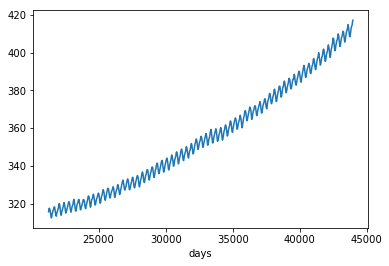

In [38]:
data['days'] = [int(date) for date in data['    Date']]
sorted_data = data.astype(float).set_index('days').sort_index()
CO2_data = sorted_data['      CO2'].astype(float)
CO2_data.plot()

Si on regarde sur une plus petite periode de temps:

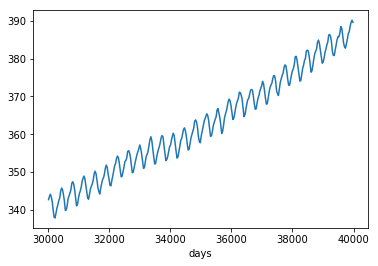

In [44]:
CO2_data[30000:40000].plot()

On constate une forme de periodicité des emissions sur une periode d'un an. Observons le comportement sur l'année 2019:

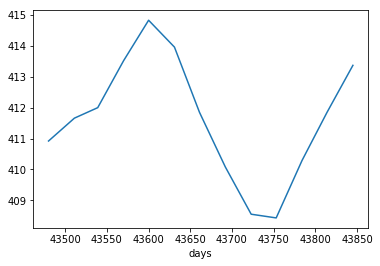

In [45]:
requeteCO2_data[43480:43845].plot()

In [48]:
data[data['  Yr'] == '2019']

Yr   Mn      Date        Date        CO2 seasonally          fit  \
734  2019   01     43480   2019.0411     410.92     410.87       410.30   
735  2019   02     43511   2019.1260     411.66     410.90       411.25   
736  2019   03     43539   2019.2027     412.00     410.46       412.25   
737  2019   04     43570   2019.2877     413.52     410.72       413.73   
738  2019   05     43600   2019.3699     414.83     411.42       414.54   
739  2019   06     43631   2019.4548     413.96     411.38       413.91   
740  2019   07     43661   2019.5370     411.85     411.03       412.36   
741  2019   08     43692   2019.6219     410.08     411.62       410.22   
742  2019   09     43723   2019.7068     408.55     412.06       408.49   
743  2019   10     43753   2019.7890     408.43     412.06       408.62   
744  2019   11     43784   2019.8740     410.29     412.56       410.21   
745  2019   12     43814   2019.9562     411.85     412.78       411.76   

      seasonally          CO2  seasonally  months   days  
734       410.24       410.92      410.87   43480  43480  
735       410.48       411.66      410.90   43511  43511  
736       410.69       412.00      410.46   43539  43539  
737       410.92       413.52      410.72   43570  43570  
738       411.14       414.83      411.42   43600  43600  
739       411.36       413.96      411.38   43631  43631  
740       411.57       411.85      411.03   43661  43661  
741       411.79       410.08      411.62   43692  43692  
742       412.02       408.55      412.06   43723  43723  
743       412.23       408.43      412.06   43753  43753  
744       412.46       410.29      412.56   43784  43784  
745       412.67       411.85      412.78   43814  43814

On constate, en observant les valeurs numériques dans la table, un maximum lors du mois de mai et un minumum lors du mois d'octobre. Observons, de manière plus générale, la distribution des maxima et minima de $CO_2$ sur l'année.

In [58]:
mois_mini = []
mois_maxi = []
for yr in range(1958,2020):
    fenetre = data[data['  Yr'] == str(yr)]
    fenetre['mois'] = [int(mois) for mois in fenetre[' Mn']]
    fenetre_triee = fenetre.astype(float).set_index('mois').sort_index()
    mois_mini.append(int(fenetre_triee['     CO2'].idxmin()))
    mois_maxi.append(int(fenetre_triee['     CO2'].idxmax()))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Voici l'histogramme correspondant pour les mois ayant les emissions minimales:

(array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0., 33., 27.,  0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

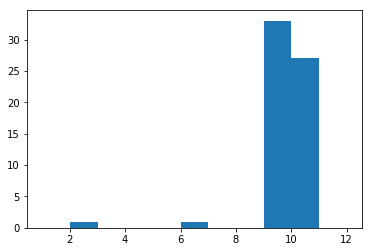

In [66]:
plt.hist(mois_mini, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

Et l'histogramme pour les emissions maximales:

(array([ 0.,  0.,  0.,  2., 60.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 11 Patch objects>)

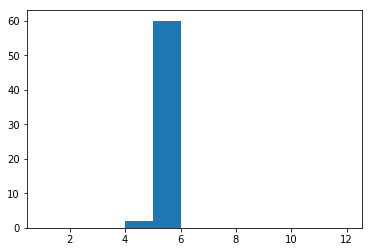

In [67]:
plt.hist(mois_maxi, bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

D'après ces résultats, les mois de mai et de septembre correspondent aux maximums d'emission en général.
Pour observer l'évolution globale des niveaux de $CO_2$, nous allons nous concentrer sur ces deux mois.

In [83]:
frame_septembre = data[data[' Mn'] == ' 09'] 
frame_septembre = frame_septembre.astype(float).set_index('  Yr').sort_index()
frame_mai = data[data[' Mn'] == ' 05'] 
frame_mai = frame_mai.astype(float).set_index('  Yr').sort_index()

Voici le graphe pour l'évolution du niveau de CO2 à chaque mois de septembre:

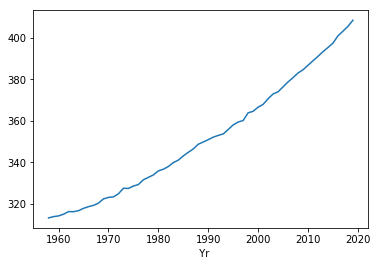

In [84]:
frame_septembre['     CO2'].plot()

Et pour le mois de mai:

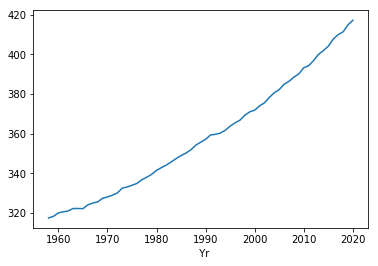

In [86]:
frame_mai['     CO2'].plot()

On observe dans les deux cas une évolution globale du niveau de $CO_2$ dans l'atmosphère d'environ $100 ppm$ sur la periode considérée.